# **Connect to Google Drive**

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


# **Import library**

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.models import Model, Input

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
import warnings
warnings.filterwarnings("ignore")

# **Data overview**

In [6]:
path_csv = '/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data/mushroom_dataset.csv'
df = pd.read_csv(path_csv)
df_plot = df[df.Label != 'EDIBLE']

In [7]:
df['Label'].value_counts()

EDIBLE                               3477
POISONOUS_PLEUROCYBELLA_PORRIGENS     385
POISONOUS_GALERINA_MARGINATA          357
POISONOUS_CORTINARIUS_RUBELLUS        351
POISONOUS_AMANITA_MUSCARIA            341
POISONOUS_CLITOCYBE_DEALBATA          338
POISONOUS_GYROMITRA_ESCULENTA         330
POISONOUS_AMANITA_VIROSA              285
POISONOUS_AMANITA_PHALLOIDES          281
POISONOUS_AMANITA_VERNA               188
POISONOUS_PODOSTROMA_CORNUDAMAE        53
Name: Label, dtype: int64

In [8]:
sns.color_palette("light:b", as_cmap=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

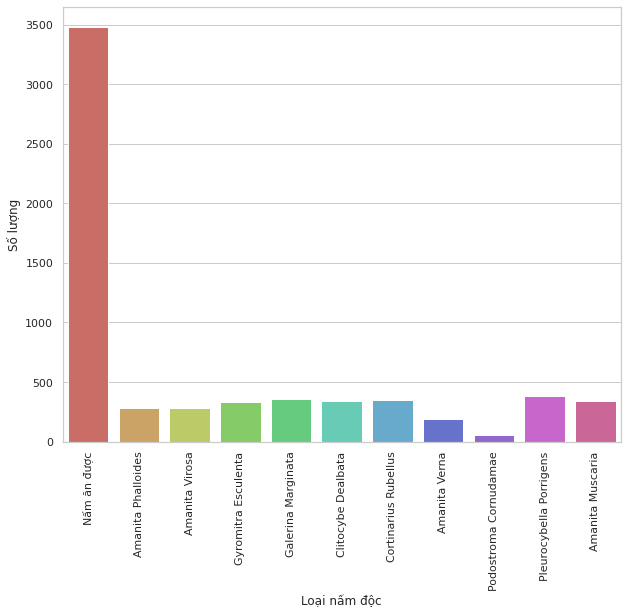

In [9]:
x_ticks = df['Label'].unique()
x_ticks = [i.replace('POISONOUS_', '').replace('_', ' ').lower().title() for i in x_ticks]
x_ticks[0] = 'Nấm ăn được'
sns.set(style="whitegrid", color_codes=True)
class_names = ['Edible', 'Poisonous']
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Label', data=df, palette='hls')
ax.set(xlabel='Loại nấm độc', ylabel='Số lượng')
ax.set_xticklabels(x_ticks)
plt.xticks(rotation=90)

In [10]:
df_plot['Label'].value_counts()

POISONOUS_PLEUROCYBELLA_PORRIGENS    385
POISONOUS_GALERINA_MARGINATA         357
POISONOUS_CORTINARIUS_RUBELLUS       351
POISONOUS_AMANITA_MUSCARIA           341
POISONOUS_CLITOCYBE_DEALBATA         338
POISONOUS_GYROMITRA_ESCULENTA        330
POISONOUS_AMANITA_VIROSA             285
POISONOUS_AMANITA_PHALLOIDES         281
POISONOUS_AMANITA_VERNA              188
POISONOUS_PODOSTROMA_CORNUDAMAE       53
Name: Label, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

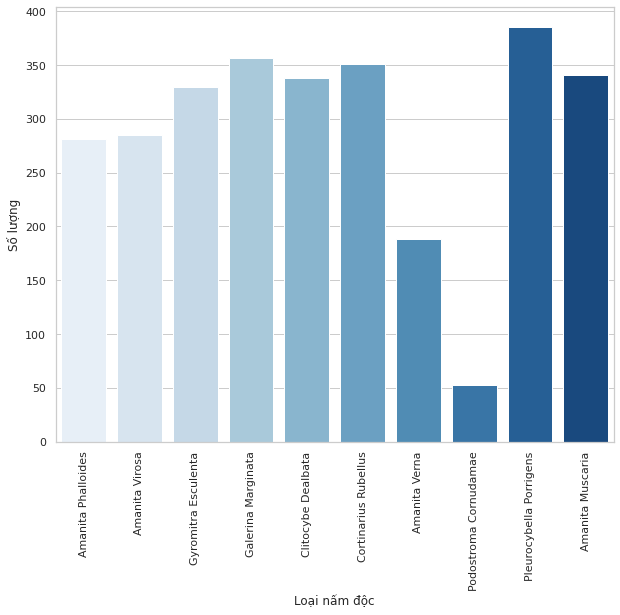

In [11]:
x_ticks = df_plot['Label'].unique()
x_ticks = [i.replace('POISONOUS_', '').replace('_', ' ').lower().title() for i in x_ticks]
sns.set(style="whitegrid", color_codes=True)
class_names = ['Edible', 'Poisonous']
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Label', data=df_plot, palette='Blues')
ax.set(xlabel='Loại nấm độc', ylabel='Số lượng')
ax.set_xticklabels(x_ticks)
plt.xticks(rotation=90)

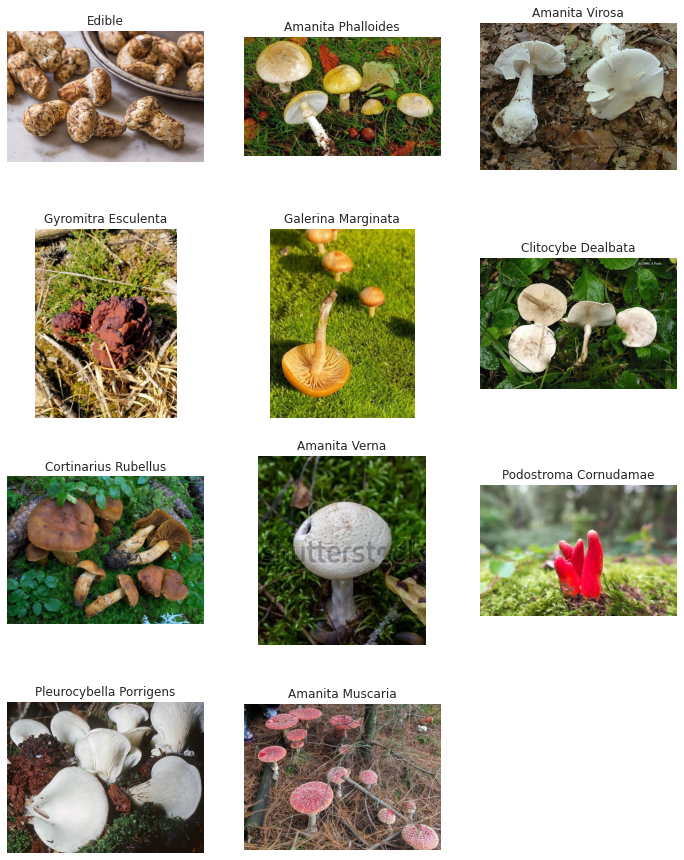

In [12]:
nrows = 4
ncols = 3
position = 0

data_path = '/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/test'

for subfolder in os.listdir(data_path):
    image_file = os.listdir(os.path.join(data_path, subfolder))[0]

    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    position += 1
    sp = plt.subplot(nrows, ncols, position)
    cur_image = mpimg.imread(os.path.join(data_path, subfolder, image_file))
    plt.imshow(cur_image)
    plt.title(subfolder.replace('POISONOUS_', '').replace('_', ' ').lower().title())
    plt.axis('Off')

# **Load data**

In [13]:
IMG_SIZE = 227
BATCH_SIZE = 128
IMG_CHANNEL = 3

In [14]:
data_generator_train = ImageDataGenerator(preprocessing_function=preprocess_input,
                                          horizontal_flip = True,
                                          vertical_flip=True,
                                          zoom_range=0.1,
                                          rotation_range=10)

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator_train.flow_from_directory(directory='/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/train',
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='categorical',
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True)

dev_generator = data_generator.flow_from_directory(directory='/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/dev',
                                                   target_size=(IMG_SIZE, IMG_SIZE),
                                                   class_mode='categorical',
                                                   batch_size=BATCH_SIZE,
                                                   shuffle=True)
                    
test_generator = data_generator.flow_from_directory(directory='/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/test',
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    class_mode='categorical',
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True)

Found 4589 images belonging to 11 classes.
Found 515 images belonging to 11 classes.
Found 1282 images belonging to 11 classes.


In [15]:
class_dictionary = test_generator.class_indices
class_names = list(class_dictionary.keys())
class_names = [i.replace('POISONOUS_', '').replace('_', ' ').lower().title() for i in class_names]
class_names

['Edible',
 'Amanita Muscaria',
 'Amanita Phalloides',
 'Amanita Verna',
 'Amanita Virosa',
 'Clitocybe Dealbata',
 'Cortinarius Rubellus',
 'Galerina Marginata',
 'Gyromitra Esculenta',
 'Pleurocybella Porrigens',
 'Podostroma Cornudamae']

# **Model**

In [16]:
def show_accuracy_loss(history):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(20, 6))
    for i, item in enumerate(['accuracy', 'loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax = plt.plot(history.history[item])
        ax = plt.plot(history.history['val_'+item])
        plt.title('model '+item)
        plt.ylabel(item)
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')

## **VGG16**

### **Training**

In [ ]:
vgg = VGG16(include_top=False, weights="imagenet", input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL))

for layer in vgg.layers:
    layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
batch = BatchNormalization()(flat)
dense = Dense(256, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
dense = Dense(128, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
dense = Dense(64, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
output = Dense(11, activation='softmax')(batch)

model = Model(inputs=vgg.inputs, outputs=output)

optimizer = Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                              

In [ ]:
history = model.fit(train_generator,
                    validation_data=dev_generator,
                    epochs=40)

Epoch 1/40
36/36 [==============================] - 1458s 39s/step - loss: 2.7127 - accuracy: 0.1467 - val_loss: 2.2996 - val_accuracy: 0.4252
Epoch 2/40
36/36 [==============================] - 184s 5s/step - loss: 2.2413 - accuracy: 0.2911 - val_loss: 1.8722 - val_accuracy: 0.5243
Epoch 3/40
36/36 [==============================] - 180s 5s/step - loss: 1.8992 - accuracy: 0.4249 - val_loss: 1.4924 - val_accuracy: 0.6117
Epoch 4/40
36/36 [==============================] - 179s 5s/step - loss: 1.6810 - accuracy: 0.5156 - val_loss: 1.1938 - val_accuracy: 0.6796
Epoch 5/40
36/36 [==============================] - 180s 5s/step - loss: 1.4545 - accuracy: 0.5792 - val_loss: 1.0297 - val_accuracy: 0.7126
Epoch 6/40
36/36 [==============================] - 184s 5s/step - loss: 1.3449 - accuracy: 0.6134 - val_loss: 0.9478 - val_accuracy: 0.7359
Epoch 7/40
36/36 [==============================] - 182s 5s/step - loss: 1.2240 - accuracy: 0.6439 - val_loss: 0.9085 - val_accuracy: 0.7301
Epoch 8/40


### **Save and load**

In [ ]:
path_model = '/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/vgg16_data_augmentation.h5'

In [ ]:
model.save(path_model, save_format='h5')

In [ ]:
model = keras.models.load_model(path_model)

### **Evaluate**

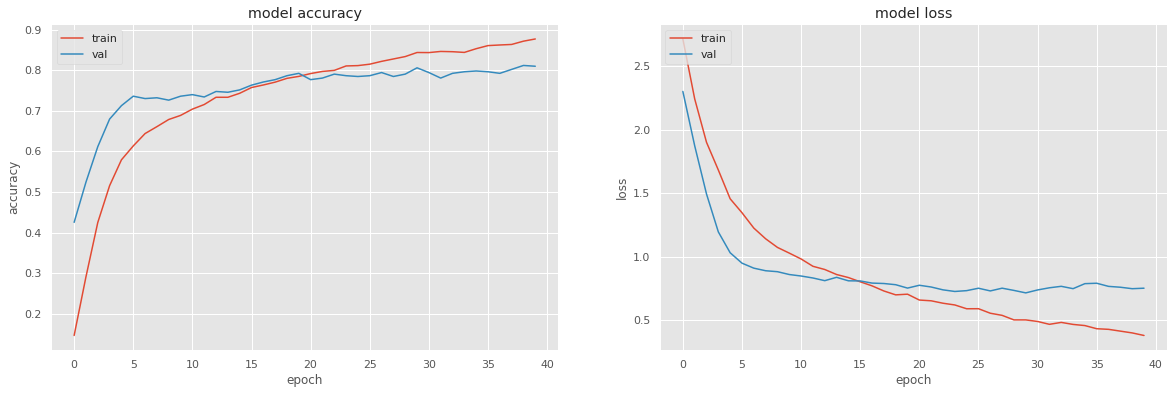

In [ ]:
show_accuracy_loss(history)

In [ ]:
y_pred_total = []
y_true = []

for idx, (img, label) in enumerate(test_generator):
    if idx == len(test_generator):
        break
    y_pred = model.predict(img)
    y_pred = np.argmax(y_pred, axis=-1)
    y_pred_total += y_pred.tolist()
    y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred_total)))
print("Precision - micro: {:.4f}".format(precision_score(y_true, y_pred_total, average='micro')))
print("Precision - macro: {:.4f}".format(precision_score(y_true, y_pred_total, average='macro')))
print("Recall - micro: {:.4f}".format(recall_score(y_true, y_pred_total, average='micro')))
print("Recall - macro: {:.4f}".format(recall_score(y_true, y_pred_total, average='macro')))
print("F1 - micro: {:.4f}".format(f1_score(y_true, y_pred_total, average='micro')))
print("F1 - macro: {:.4f}".format(f1_score(y_true, y_pred_total, average='macro')))

Accuracy: 0.7793
Precision - micro: 0.7793
Precision - macro: 0.7668
Recall - micro: 0.7793
Recall - macro: 0.6487
F1 - micro: 0.7793
F1 - macro: 0.6898


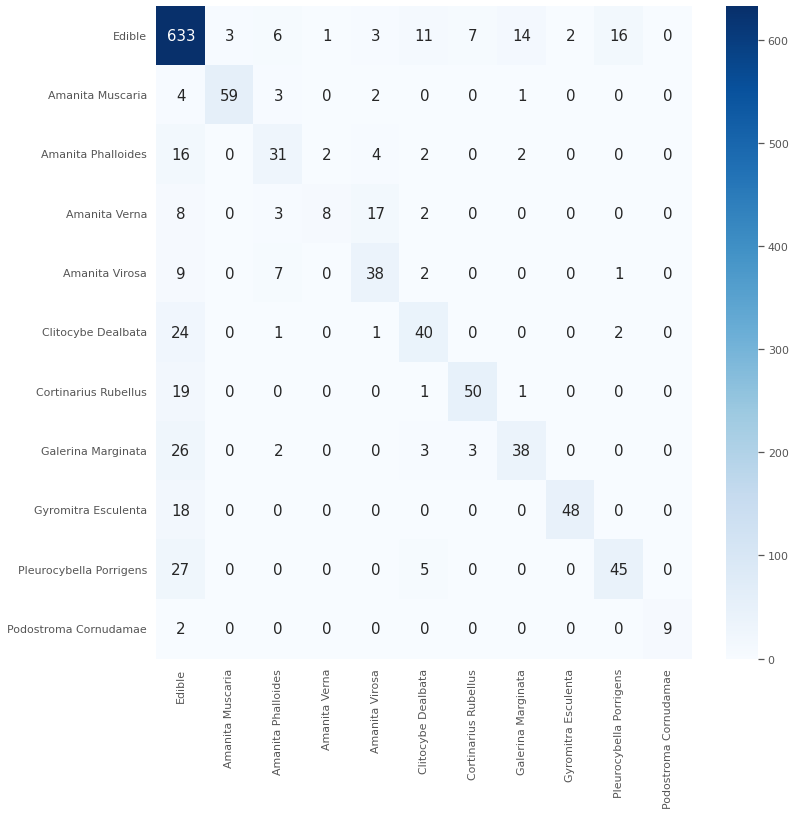

In [ ]:
cf = confusion_matrix(y_true, y_pred_total)
df_cm = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(12, 12))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g', cbar=True, annot_kws={"size": 15})

In [ ]:
print(classification_report(y_true, y_pred_total, target_names=class_names))

                         precision    recall  f1-score   support

                 Edible       0.81      0.91      0.85       696
       Amanita Muscaria       0.95      0.86      0.90        69
     Amanita Phalloides       0.58      0.54      0.56        57
          Amanita Verna       0.73      0.21      0.33        38
         Amanita Virosa       0.58      0.67      0.62        57
     Clitocybe Dealbata       0.61      0.59      0.60        68
   Cortinarius Rubellus       0.83      0.70      0.76        71
     Galerina Marginata       0.68      0.53      0.59        72
    Gyromitra Esculenta       0.96      0.73      0.83        66
Pleurocybella Porrigens       0.70      0.58      0.64        77
  Podostroma Cornudamae       1.00      0.82      0.90        11

               accuracy                           0.78      1282
              macro avg       0.77      0.65      0.69      1282
           weighted avg       0.78      0.78      0.77      1282



## **Resnet50**

### **Training**

In [ ]:
resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL))

for layer in resnet.layers:
    layer.trainable = False

flat = Flatten()(resnet.layers[-1].output)
batch = BatchNormalization()(flat)
dense = Dense(256, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
dense = Dense(128, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
dense = Dense(64, activation='relu')(batch)
dropout = Dropout(0.5)(dense)
batch = BatchNormalization()(dropout)
output = Dense(11, activation='softmax')(batch)

model = Model(inputs=resnet.inputs, outputs=output)

optimizer = Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
history = model.fit(train_generator,
                    validation_data=dev_generator,
                    epochs=40)

Epoch 1/40
36/36 [==============================] - 2915s 81s/step - loss: 2.7403 - accuracy: 0.1547 - val_loss: 2.2347 - val_accuracy: 0.4155
Epoch 2/40
36/36 [==============================] - 185s 5s/step - loss: 2.3069 - accuracy: 0.2815 - val_loss: 1.5875 - val_accuracy: 0.5650
Epoch 3/40
36/36 [==============================] - 186s 5s/step - loss: 1.9527 - accuracy: 0.4020 - val_loss: 1.2545 - val_accuracy: 0.6466
Epoch 4/40
36/36 [==============================] - 187s 5s/step - loss: 1.6841 - accuracy: 0.5056 - val_loss: 1.0185 - val_accuracy: 0.7165
Epoch 5/40
36/36 [==============================] - 189s 5s/step - loss: 1.4627 - accuracy: 0.5770 - val_loss: 0.9335 - val_accuracy: 0.7379
Epoch 6/40
36/36 [==============================] - 185s 5s/step - loss: 1.3112 - accuracy: 0.6228 - val_loss: 0.8625 - val_accuracy: 0.7476
Epoch 7/40
36/36 [==============================] - 186s 5s/step - loss: 1.1942 - accuracy: 0.6550 - val_loss: 0.8234 - val_accuracy: 0.7456
Epoch 8/40


### **Save and load**

In [ ]:
path_model = '/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/resnet50_data_augmentation.h5'

In [ ]:
model.save(path_model, save_format='h5')

In [ ]:
model = keras.models.load_model(path_model)

### **Evaluate**

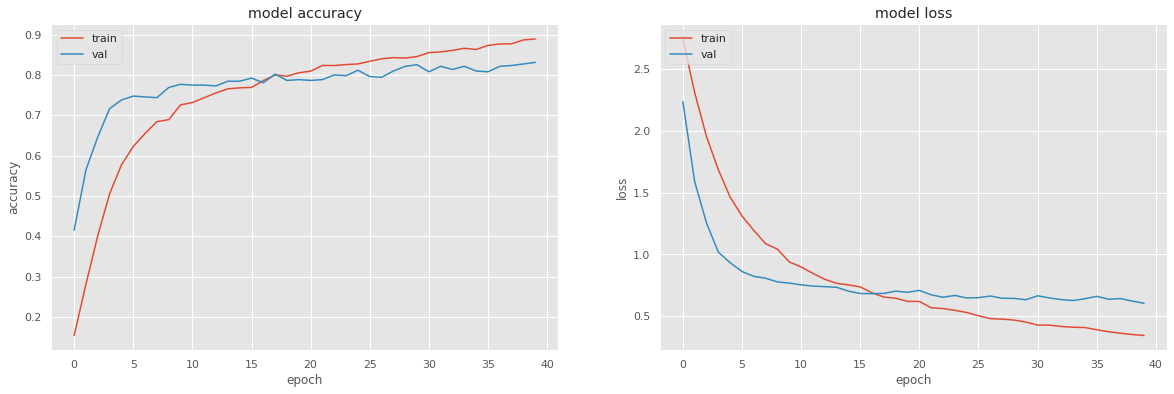

In [ ]:
show_accuracy_loss(history)

In [ ]:
y_pred_total = []
y_true = []

for idx, (img, label) in enumerate(test_generator):
    if idx == len(test_generator):
        break
    y_pred = model.predict(img)
    y_pred = np.argmax(y_pred, axis=-1)
    y_pred_total += y_pred.tolist()
    y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [ ]:
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred_total)))
print("Precision - micro: {:.4f}".format(precision_score(y_true, y_pred_total, average='micro')))
print("Precision - macro: {:.4f}".format(precision_score(y_true, y_pred_total, average='macro')))
print("Recall - micro: {:.4f}".format(recall_score(y_true, y_pred_total, average='micro')))
print("Recall - macro: {:.4f}".format(recall_score(y_true, y_pred_total, average='macro')))
print("F1 - micro: {:.4f}".format(f1_score(y_true, y_pred_total, average='micro')))
print("F1 - macro: {:.4f}".format(f1_score(y_true, y_pred_total, average='macro')))

Accuracy: 0.8346
Precision - micro: 0.8346
Precision - macro: 0.7792
Recall - micro: 0.8346
Recall - macro: 0.6864
F1 - micro: 0.8346
F1 - macro: 0.7231


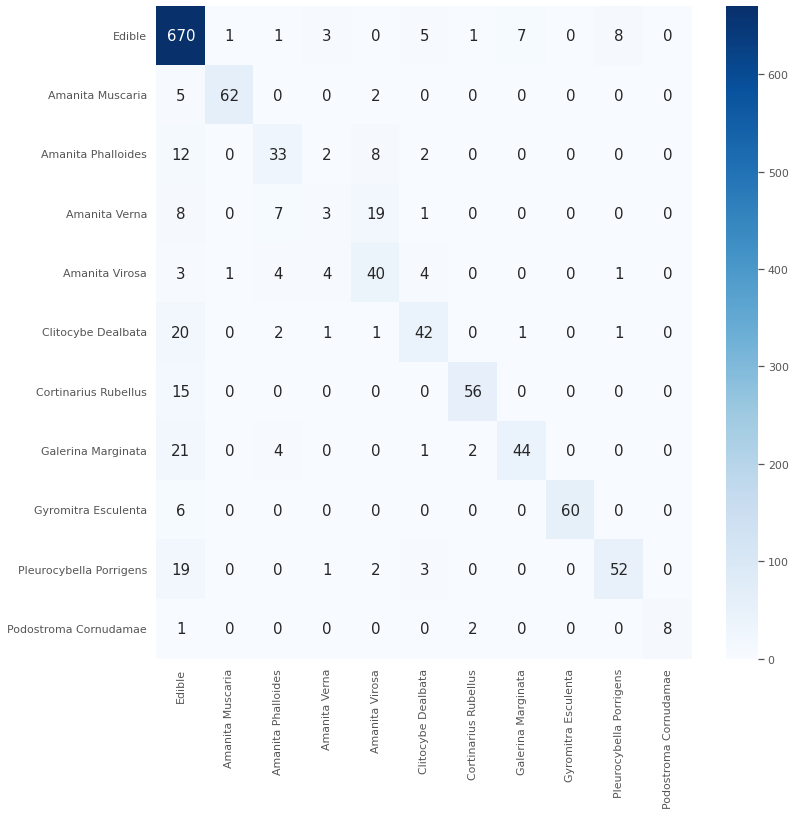

In [ ]:
cf = confusion_matrix(y_true, y_pred_total)
df_cm = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(12, 12))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g', cbar=True, annot_kws={"size": 15})

In [ ]:
print(classification_report(y_true, y_pred_total, target_names=class_names))

                         precision    recall  f1-score   support

                 Edible       0.86      0.96      0.91       696
       Amanita Muscaria       0.97      0.90      0.93        69
     Amanita Phalloides       0.65      0.58      0.61        57
          Amanita Verna       0.21      0.08      0.12        38
         Amanita Virosa       0.56      0.70      0.62        57
     Clitocybe Dealbata       0.72      0.62      0.67        68
   Cortinarius Rubellus       0.92      0.79      0.85        71
     Galerina Marginata       0.85      0.61      0.71        72
    Gyromitra Esculenta       1.00      0.91      0.95        66
Pleurocybella Porrigens       0.84      0.68      0.75        77
  Podostroma Cornudamae       1.00      0.73      0.84        11

               accuracy                           0.83      1282
              macro avg       0.78      0.69      0.72      1282
           weighted avg       0.83      0.83      0.82      1282



## **EfficientNet**

### **Training**

In [17]:
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

model.trainable = False

x = GlobalAveragePooling2D(name="avg_pool")(model.output)
x = BatchNormalization()(x)

top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = Dense(11, activation="softmax", name="pred")(x)

model = Model(inputs, outputs, name="EfficientNet")

optimizer = Adam(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 227, 227, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 227, 227, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPa

In [18]:
history = model.fit(train_generator,
                    validation_data=dev_generator,
                    epochs=40)

Epoch 1/40
36/36 [==============================] - 3134s 86s/step - loss: 2.4717 - accuracy: 0.2807 - val_loss: 1.7646 - val_accuracy: 0.6194
Epoch 2/40
36/36 [==============================] - 173s 5s/step - loss: 1.4533 - accuracy: 0.5513 - val_loss: 1.2585 - val_accuracy: 0.7379
Epoch 3/40
36/36 [==============================] - 173s 5s/step - loss: 1.0946 - accuracy: 0.6644 - val_loss: 1.0242 - val_accuracy: 0.6796
Epoch 4/40
36/36 [==============================] - 179s 5s/step - loss: 0.8424 - accuracy: 0.7357 - val_loss: 0.9100 - val_accuracy: 0.6816
Epoch 5/40
36/36 [==============================] - 172s 5s/step - loss: 0.7556 - accuracy: 0.7649 - val_loss: 0.8313 - val_accuracy: 0.6971
Epoch 6/40
36/36 [==============================] - 171s 5s/step - loss: 0.6734 - accuracy: 0.7812 - val_loss: 0.7563 - val_accuracy: 0.7146
Epoch 7/40
36/36 [==============================] - 173s 5s/step - loss: 0.6228 - accuracy: 0.8015 - val_loss: 0.7101 - val_accuracy: 0.7340
Epoch 8/40


### **Save and load**

In [19]:
path_model = '/content/drive/MyDrive/Colab/NhapMonThiGiacMayTinh/MushroomClassification/data/data_splited_species/efficientnet_b0_data_augmentation.h5'

In [20]:
model.save(path_model, save_format='h5')

In [ ]:
model = keras.models.load_model(path_model)

### **Evaluate**

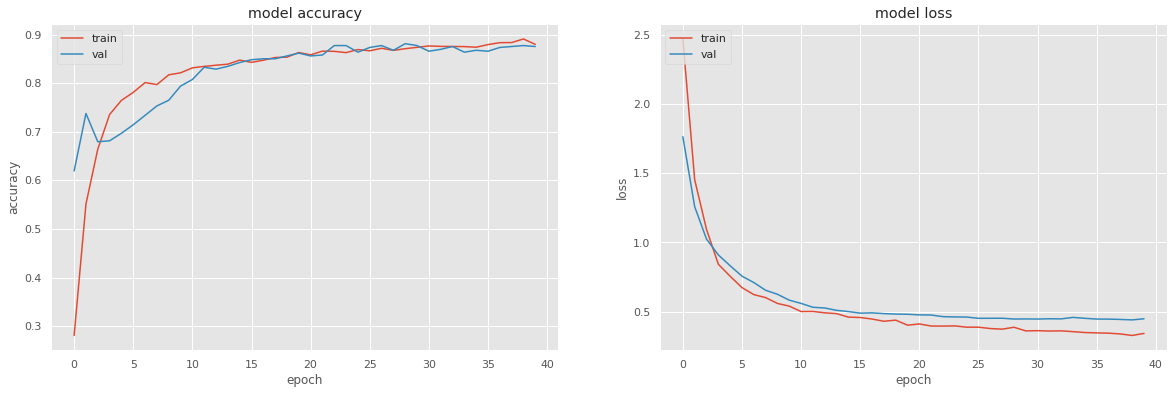

In [21]:
show_accuracy_loss(history)

In [22]:
y_pred_total = []
y_true = []

for idx, (img, label) in enumerate(test_generator):
    if idx == len(test_generator):
        break
    y_pred = model.predict(img)
    y_pred = np.argmax(y_pred, axis=-1)
    y_pred_total += y_pred.tolist()
    y_true += np.array(np.argmax(label, axis=-1)).flatten().tolist()

In [23]:
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred_total)))
print("Precision - micro: {:.4f}".format(precision_score(y_true, y_pred_total, average='micro')))
print("Precision - macro: {:.4f}".format(precision_score(y_true, y_pred_total, average='macro')))
print("Recall - micro: {:.4f}".format(recall_score(y_true, y_pred_total, average='micro')))
print("Recall - macro: {:.4f}".format(recall_score(y_true, y_pred_total, average='macro')))
print("F1 - micro: {:.4f}".format(f1_score(y_true, y_pred_total, average='micro')))
print("F1 - macro: {:.4f}".format(f1_score(y_true, y_pred_total, average='macro')))

Accuracy: 0.8643
Precision - micro: 0.8643
Precision - macro: 0.8351
Recall - micro: 0.8643
Recall - macro: 0.7917
F1 - micro: 0.8643
F1 - macro: 0.8112


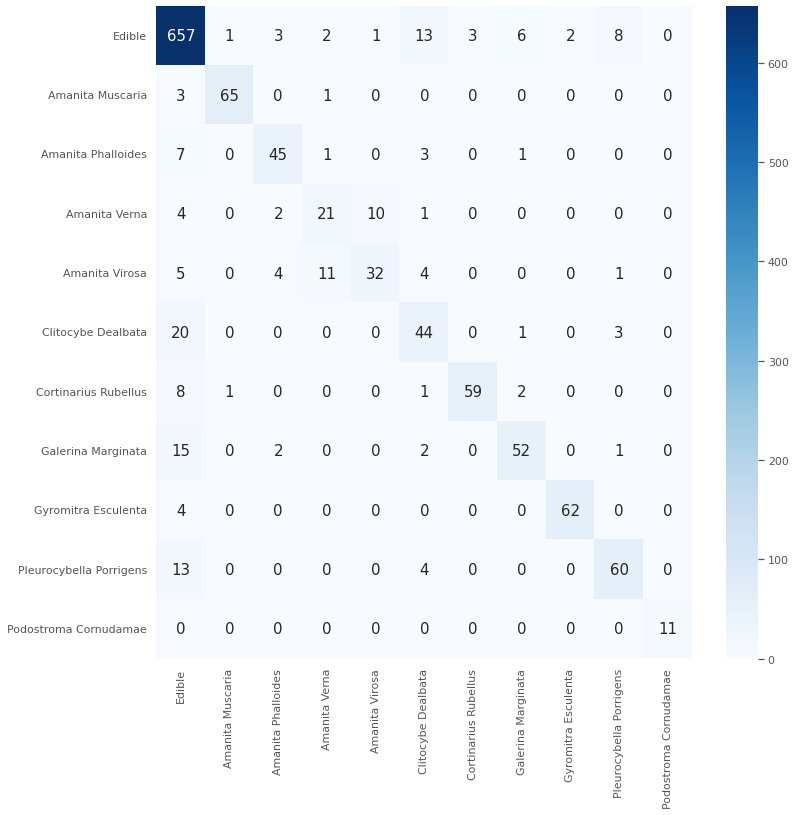

In [24]:
cf = confusion_matrix(y_true, y_pred_total)
df_cm = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(12, 12))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g', cbar=True, annot_kws={"size": 15})

In [25]:
print(classification_report(y_true, y_pred_total, target_names=class_names))

                         precision    recall  f1-score   support

                 Edible       0.89      0.94      0.92       696
       Amanita Muscaria       0.97      0.94      0.96        69
     Amanita Phalloides       0.80      0.79      0.80        57
          Amanita Verna       0.58      0.55      0.57        38
         Amanita Virosa       0.74      0.56      0.64        57
     Clitocybe Dealbata       0.61      0.65      0.63        68
   Cortinarius Rubellus       0.95      0.83      0.89        71
     Galerina Marginata       0.84      0.72      0.78        72
    Gyromitra Esculenta       0.97      0.94      0.95        66
Pleurocybella Porrigens       0.82      0.78      0.80        77
  Podostroma Cornudamae       1.00      1.00      1.00        11

               accuracy                           0.86      1282
              macro avg       0.84      0.79      0.81      1282
           weighted avg       0.86      0.86      0.86      1282

